# Does price affect the number of downloads for the ENTERTAINMENT category?

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # To visualize
from matplotlib import gridspec
import matplotlib.ticker as mticker
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


## Data Reading and Preparation

In [2]:
data = pd.read_csv('googleplaystoremaster.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [4]:
data['Category'].nunique()

34

In [5]:
data[data['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
data = data[data['Category']== 'ENTERTAINMENT']
data.shape

(149, 13)

In [7]:
data = data.filter(items=['Installs', 'Price'])
data.head()

,Installs,Price
855,"100,000,000+",0
856,"1,000,000+",0
857,"1,000,000+",0
858,"10,000,000+",0
859,"50,000,000+",0


In [8]:
data['Installs'].unique()

array(['100,000,000+', '1,000,000+', '10,000,000+', '50,000,000+',
       '5,000,000+', '1,000,000,000+', '100,000+', '500,000+', '50,000+',
       '10,000+'], dtype=object)

In [9]:
data['Installs'].nunique()

10

In [10]:
data['Installs_num'] = data['Installs'].str.replace(',','')
data['Installs_num'] = data['Installs_num'].str.replace('+','')

data['Installs_num'] = pd.to_numeric(data['Installs_num'])

<ipython-input-10-0e1fc632cfec>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Installs_num'] = data['Installs_num'].str.replace('+','')


In [11]:
data.head()

,Installs,Price,Installs_num
855,"100,000,000+",0,100000000
856,"1,000,000+",0,1000000
857,"1,000,000+",0,1000000
858,"10,000,000+",0,10000000
859,"50,000,000+",0,50000000


In [12]:
data['Price'].nunique()

3

In [13]:
data['Price'].unique()

array(['0', '$4.99', '$2.99'], dtype=object)

In [14]:
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = pd.to_numeric(data['Price'])

<ipython-input-14-ffbb7eb85b61>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$','')


In [15]:
data['Price'].unique()

array([0.  , 4.99, 2.99])

## Linear regression Analysis

In [16]:
X = data.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.007
Method:                 Least Squares   F-statistic:                          2.492e-06
Date:                Thu, 04 Feb 2021   Prob (F-statistic):                       0.999
Time:                        23:14:52   Log-Likelihood:                         -2934.7
No. Observations:                 149   AIC:                                      5871.
Df Residuals:                     148   BIC:                                      5874.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
data_zero = data[data['Price']== 0]
data_zero.shape

(147, 3)

In [28]:
data_299 = data[data['Price']== 2.99]
data_299.shape

(1, 3)

In [29]:
data_499 = data[data['Price']== 4.99]
data_499.shape

(1, 3)

In [30]:
data_zero['Installs'].value_counts()

1,000,000+        51
10,000,000+       48
5,000,000+        17
100,000,000+      10
100,000+           9
50,000,000+        5
500,000+           4
10,000+            1
50,000+            1
1,000,000,000+     1
Name: Installs, dtype: int64

In [31]:
data_299['Installs'].value_counts()

100,000+    1
Name: Installs, dtype: int64

In [32]:
data_499['Installs'].value_counts()

100,000+    1
Name: Installs, dtype: int64

[Text(0, 0.0, ''),
 Text(0, 10.0, ''),
 Text(0, 20.0, ''),
 Text(0, 30.0, ''),
 Text(0, 40.0, ''),
 Text(0, 50.0, ''),
 Text(0, 60.0, '')]

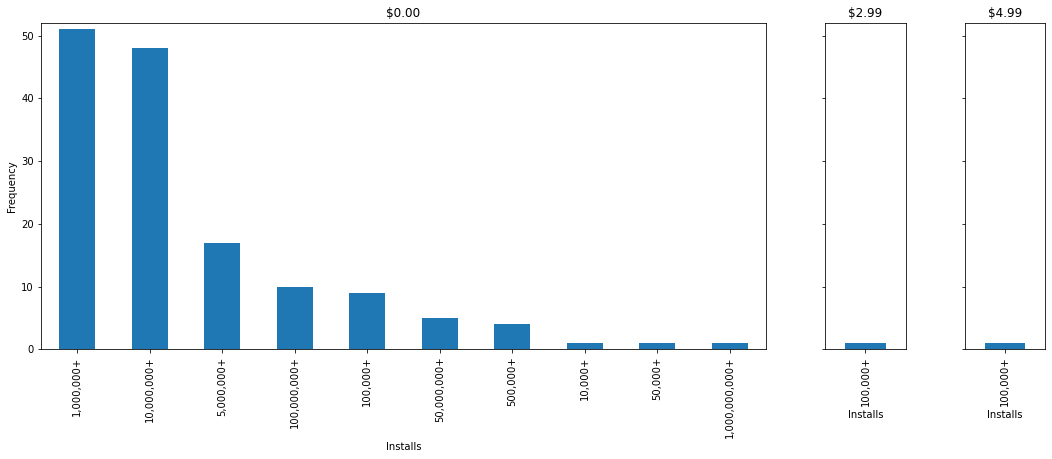

In [34]:
fig = plt.figure(figsize=(18, 6)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[9, 1, 1])

ax0 = plt.subplot(gs[0])
data_zero['Installs'].value_counts().plot(kind='bar')
plt.title("$0.00")
plt.xlabel("Installs")
plt.ylabel("Frequency")
ax0.set_ylim(0,52)

ax1 = plt.subplot(gs[1])
data_299['Installs'].value_counts().plot(kind='bar')
plt.title("$2.99")
plt.xlabel("Installs")
ax1.set_ylim(0,52)
ax1.set_yticklabels([])

ax2 = plt.subplot(gs[2])
data_499['Installs'].value_counts().plot(kind='bar')
plt.title("$4.99")
plt.xlabel("Installs")
ax2.set_ylim(0,52)
ax2.set_yticklabels([])